In [1]:
import pandas as pd
import glob

files = [i for i in glob.glob(r'/workspaces/miniconda/PKdata/data/*.csv') if 'nca' not in i]

In [2]:

for f_idx, f in enumerate(files):
    if f_idx == 0:
        df_out = pd.read_csv(f)
        df_out = df_out[[i for i in df_out.columns if 'unnamed' not in i.lower()]]
        df_out['TIME'] = df_out['TIME'].astype(float)
    else:
        tmp = pd.read_csv(f)
        tmp = tmp[[i for i in tmp.columns if 'unnamed' not in i.lower()]]
        if 'TIME' in tmp.columns:
            tmp['TIME'] = df_out['TIME'].astype(float)
            merge_c = ['ID', 'TIME']
        else:
            merge_c = ['ID']
        df_out = df_out.merge(tmp, how = 'left', on = merge_c)
        

In [3]:
import numpy as np
from nca import estimate_subject_slope_cv, estimate_k_halflife
xth_df = df_out.loc[df_out['ANALYTE'] == 'xanthohumol', :].copy()


In [4]:
xth_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex
0,L1,0.00,0,xanthohumol,20.0,oral,M
1,L1,0.25,0,xanthohumol,NaN,NaN,M
2,L1,0.50,0,xanthohumol,NaN,NaN,M
3,L1,1.00,34,xanthohumol,NaN,NaN,M
4,L1,1.50,15,xanthohumol,NaN,NaN,M
...,...,...,...,...,...,...,...
1101,H17,24.00,6,xanthohumol,NaN,NaN,M
1102,H17,48.00,0,xanthohumol,NaN,NaN,M
1103,H17,72.00,0,xanthohumol,NaN,NaN,M
1104,H17,96.00,0,xanthohumol,NaN,NaN,M


In [5]:
tmp_df = pd.DataFrame({
    'ID':np.repeat('P1', 10), 
    'TIME':[0,1,2,3,4,6,9,12,18,24],
    'CONC':[8,7.09, 6.29, 5.58, 4.95, 3.89, 2.71, 1.89, 0.92, 0.44]
})
tmp_df2 = pd.DataFrame({
    'ID':np.repeat('P2', 10), 
    'TIME':[0,1,2,3,4,6,9,12,18,24],
    'CONC':[0, 12.18, 14.12, 13.43, 12.16, 9.64, 6.73, 4.69, 2.28, 1.11]
})
tmp_df = pd.concat([tmp_df, tmp_df2])

tmp_df['CONC_ln'] = np.log(tmp_df['CONC'])

/opt/conda/envs/pySunODE/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
tmp_df

,ID,TIME,CONC,CONC_ln
0,P1,0,8.00,2.079442
1,P1,1,7.09,1.958685
2,P1,2,6.29,1.838961
3,P1,3,5.58,1.719189
4,P1,4,4.95,1.599388
5,P1,6,3.89,1.358409
6,P1,9,2.71,0.996949
7,P1,12,1.89,0.636577
8,P1,18,0.92,-0.083382
9,P1,24,0.44,-0.820981


<Axes: xlabel='TIME', ylabel='CONC'>

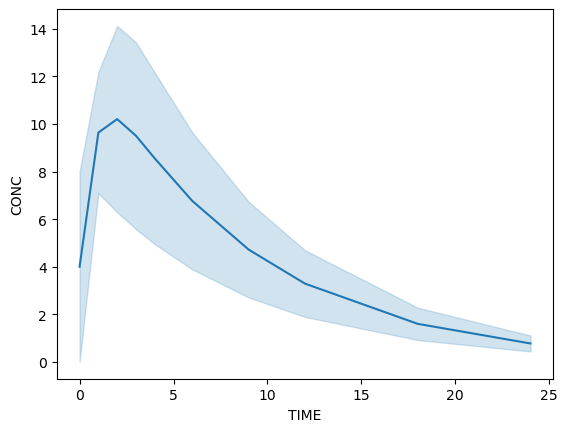

In [7]:
import seaborn as sns
sns.lineplot(tmp_df, x = 'TIME', y = 'CONC')


In [8]:
k_est = (np.log(.92) - np.log(.44)) / (18-24)
k_est

-0.1229331571884632

In [ ]:
use_toy_2 = False
if use_toy_2:
    xth_df = tmp_df.copy()

In [10]:
xth_df

,ID,TIME,CONC,CONC_ln
0,P1,0,8.00,2.079442
1,P1,1,7.09,1.958685
2,P1,2,6.29,1.838961
3,P1,3,5.58,1.719189
4,P1,4,4.95,1.599388
5,P1,6,3.89,1.358409
6,P1,9,2.71,0.996949
7,P1,12,1.89,0.636577
8,P1,18,0.92,-0.083382
9,P1,24,0.44,-0.820981


# K and Halflife (t_1/2)

In [11]:
dfs = []
for sub in xth_df['ID'].unique():
    dfs.append(estimate_subject_slope_cv(xth_df.loc[xth_df['ID'] == sub, :], conc_col='CONC'))

In [12]:
dfs[0]

,ID,auc_per_time,start_time,end_time,slope,start_idx_slope_cv,intercept,r_value,adj_r2,n_points,max_conc,max_conc_time,abs_cv,cv_sign,start_time_mean_cv_sign,start_time_mean_abs_cv,start_time_std_mean_cv
0,P1,7.545000,0,1,-0.106596,NaN,2.197225,-1.000000,NaN,2,8.0,0,NaN,NaN,-1.0,0.032171,0.030180
1,P1,7.117500,0,2,-0.105361,-0.005828,2.196813,-0.999977,0.999908,3,8.0,0,0.005828,-1.0,-1.0,0.032171,0.030180
2,P1,6.723333,0,3,-0.104369,-0.008637,2.196152,-0.999961,0.999882,4,8.0,0,0.008637,-1.0,-1.0,0.032171,0.030180
3,P1,6.358750,0,4,-0.103426,-0.011211,2.195209,-0.999938,0.999836,5,8.0,0,0.011211,-1.0,-1.0,0.032171,0.030180
4,P1,5.712500,0,6,-0.101635,-0.016198,2.192522,-0.999856,0.999640,6,8.0,0,0.016198,-1.0,-1.0,0.032171,0.030180
5,P1,4.908333,0,9,-0.098510,-0.025604,2.186107,-0.999597,0.999033,7,8.0,0,0.025604,-1.0,-1.0,0.032171,0.030180
6,P1,4.256250,0,12,-0.094987,-0.037278,2.176971,-0.999154,0.998026,8,8.0,0,0.037278,-1.0,-1.0,0.032171,0.030180
7,P1,3.305833,0,18,-0.087095,-0.060998,2.149315,-0.996491,0.991993,9,8.0,0,0.060998,-1.0,-1.0,0.032171,0.030180
8,P1,2.649375,0,24,-0.078416,-0.091612,2.111308,-0.992024,0.982125,10,8.0,0,0.091612,-1.0,-1.0,0.032171,0.030180
9,P1,6.690000,1,2,-0.104125,NaN,2.194754,-1.000000,NaN,2,8.0,0,NaN,NaN,-1.0,0.034247,0.033438


In [13]:
_ = estimate_k_halflife(dfs)
# this still needs to be filtered to give one unique value of the geom mean per subject

In [14]:
_

,ID,auc_per_time,start_time,end_time,slope,start_idx_slope_cv,intercept,r_value,adj_r2,n_points,...,start_time_mean_cv_sign,start_time_mean_abs_cv,start_time_std_mean_cv,auc_per_time_gt_lim,zero_window_time_start,consecutive_zero_windows,window_k_est,geom_mean_k_est,window_halflife_est,geom_mean_halflife_est
0,P1,7.545000,0,1,-0.106596,NaN,2.197225,-1.000000,NaN,2,...,-1.0,0.032171,0.030180,1.0,inf,0,0.106596,0.097379,6.501191,7.116495
1,P1,7.117500,0,2,-0.105361,-0.005828,2.196813,-0.999977,0.999908,3,...,-1.0,0.032171,0.030180,1.0,inf,0,0.105361,0.097379,6.577417,7.116495
2,P1,6.723333,0,3,-0.104369,-0.008637,2.196152,-0.999961,0.999882,4,...,-1.0,0.032171,0.030180,1.0,inf,0,0.104369,0.097379,6.639873,7.116495
3,P1,6.358750,0,4,-0.103426,-0.011211,2.195209,-0.999938,0.999836,5,...,-1.0,0.032171,0.030180,1.0,inf,0,0.103426,0.097379,6.700438,7.116495
4,P1,5.712500,0,6,-0.101635,-0.016198,2.192522,-0.999856,0.999640,6,...,-1.0,0.032171,0.030180,1.0,inf,0,0.101635,0.097379,6.818541,7.116495
5,P1,4.908333,0,9,-0.098510,-0.025604,2.186107,-0.999597,0.999033,7,...,-1.0,0.032171,0.030180,1.0,inf,0,0.098510,0.097379,7.034834,7.116495
6,P1,4.256250,0,12,-0.094987,-0.037278,2.176971,-0.999154,0.998026,8,...,-1.0,0.032171,0.030180,1.0,inf,0,0.094987,0.097379,7.295765,7.116495
7,P1,3.305833,0,18,-0.087095,-0.060998,2.149315,-0.996491,0.991993,9,...,-1.0,0.032171,0.030180,1.0,inf,0,0.087095,0.097379,7.956798,7.116495
8,P1,2.649375,0,24,-0.078416,-0.091612,2.111308,-0.992024,0.982125,10,...,-1.0,0.032171,0.030180,1.0,inf,0,0.078416,0.097379,8.837504,7.116495
9,P2,12.795000,3,4,-0.092127,NaN,2.945692,-1.000000,NaN,2,...,-1.0,0.050633,0.003291,1.0,inf,0,0.092127,0.099250,7.522188,6.982358


<Axes: xlabel='TIME', ylabel='CONC'>

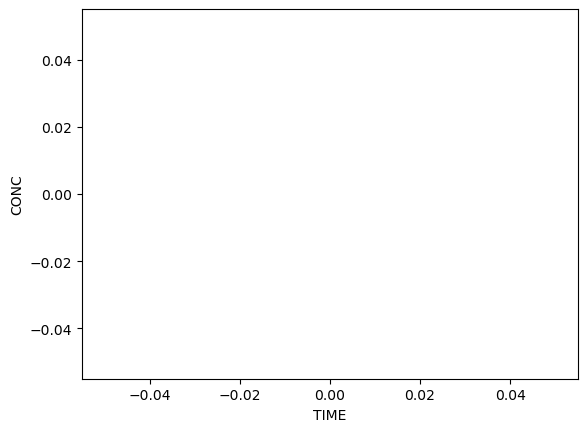

In [15]:
import seaborn as sns
from utils import safe_signed_log
from scipy.signal import savgol_filter

plot_me = xth_df.loc[(xth_df['ID'] == 'H12') & (xth_df['TIME'] < 200), :].copy()
plot_me['conc_ln'] = safe_signed_log(plot_me['CONC'])
sns.lineplot(plot_me, x = 'TIME', y = 'CONC',)


<Axes: xlabel='TIME', ylabel='CONC'>

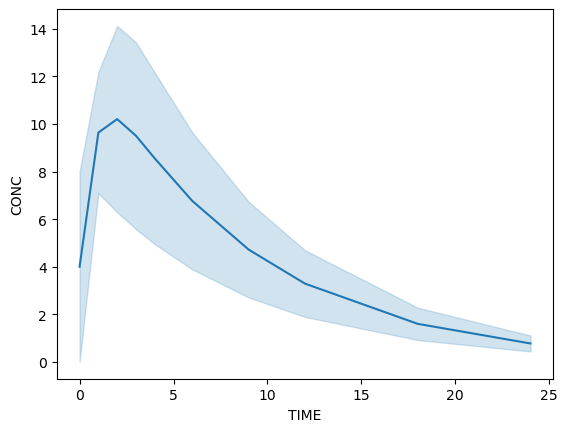

In [16]:
import seaborn as sns


sns.lineplot(xth_df, x = 'TIME', y = 'CONC',)

# MRT

In [17]:
from sklearn.metrics import auc

In [18]:
xth_df['ConcTime'] = xth_df['CONC'] * xth_df['TIME']

<Axes: xlabel='TIME', ylabel='ConcTime'>

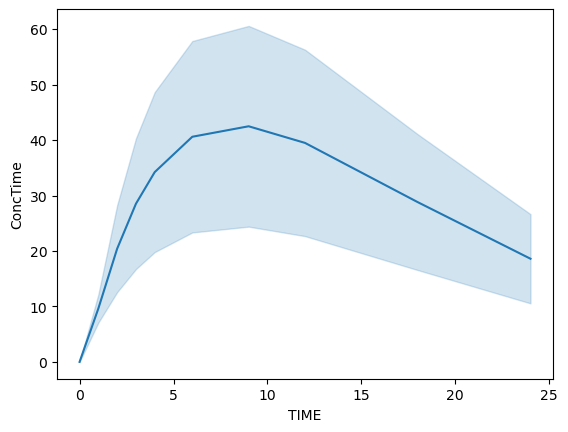

In [19]:
sns.lineplot(xth_df, x = 'TIME', y = 'ConcTime',)

In [20]:
auc_df = (xth_df
 .groupby('ID')[['TIME', 'CONC']]
 .apply(lambda x: auc(x['TIME'], x['CONC']))
 .reset_index()
 .rename(columns = {0:'AUC'})
 )

auc_df.head()


,ID,AUC
0,P1,63.585
1,P2,140.375


In [21]:
from nca import calculate_aucs
debugging_tmp = False
auc_df = []
aucmc_df = []
for sub in xth_df['ID'].unique():
    if sub == 'NoSub':
        debugging_tmp = True
        orig_settings = np.seterr(all='raise')
    work_df = xth_df.loc[xth_df['ID'] == sub, :].copy()
    aucs = calculate_aucs(work_df['TIME'].values, work_df['CONC'].values)
    if debugging_tmp:
        np.seterr(**orig_settings) 
    aucs['ID'] = sub
    work_df['ConcTime'] = work_df['TIME'].values * work_df['CONC'].values
    aucmc = calculate_aucs(work_df['TIME'].values, work_df['ConcTime'].values)
    aucmc['ID'] = sub
    auc_df.append(aucs)
    aucmc_df.append(aucmc)
auc_df = pd.concat(auc_df).reset_index(drop = True)
aucmc_df = pd.concat(aucmc_df).reset_index(drop = True)
#auc_df = auc_df.merge(aucmc_df, how = 'left', on = 'ID')

In [22]:
xth_df.loc[xth_df['ID'] == 'H12', :]

,ID,TIME,CONC,CONC_ln,ConcTime


In [23]:
auc_df.head()

,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID
0,82.00,63.585,63.585,63.585,82,P1
1,156.24,139.135,140.375,140.375,155,P2


In [24]:
aucmc_df.head()

,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID
0,442.045,435.685,430.73,430.73,447,P1
1,1068.125,1061.275,1059.40,1059.40,1070,P2


In [48]:
auc_df['MRT'] = aucmc_df['linup_logdown'] / auc_df['linup_logdown']

In [49]:
nca_df = pd.read_csv(r'/workspaces/miniconda/PKdata/data/xanthohumol_nca.csv')
#mrt_df = nca_df.loc[nca_df['Parameter'] == 'AUC']
mrt_df = nca_df.loc[nca_df['ANALYTE'] == 'xanthohumol', :]

In [50]:
mrt_df = mrt_df.pivot_table(index = ['ID', 'Software'],columns = 'Parameter', values = 'Value').reset_index()

In [51]:
plot_me = mrt_df.merge(auc_df[['ID', 'linup_logdown', 'linear_auc']], how = 'left', on = 'ID')

In [52]:
plot_me.loc[plot_me['linup_logdown'] < 0, :]

,ID,Software,AUC,AUMC,CL.F,Cmax,MRT,Tmax,Vss,Vz.F,lambda.z,thalf,linup_logdown,linear_auc


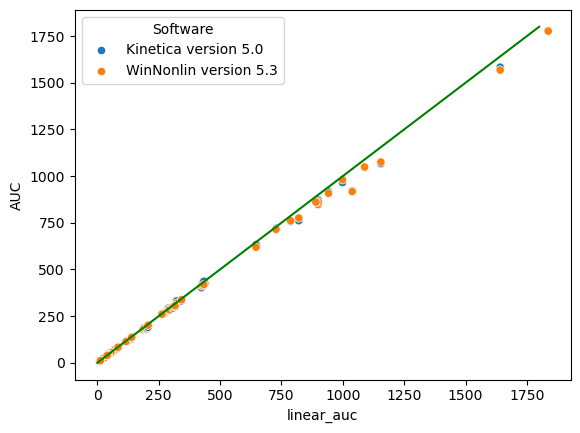

In [53]:
import matplotlib.pyplot as plt

sns.scatterplot(plot_me, x = 'linear_auc', y = 'AUC', hue = 'Software')
plt.plot(np.linspace(0,1800, 10), np.linspace(0,1800, 10), color = 'green')

In [60]:
(0.92-0.44)/(24-18)

0.08

In [61]:
.44/.08

5.5

In [54]:
plot_tmp = plot_me.loc[plot_me['linup_logdown'] >0, :]

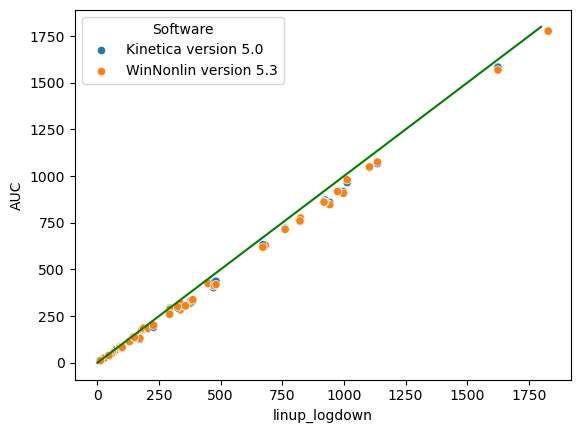

In [55]:
sns.scatterplot(plot_tmp, x = 'linup_logdown', y = 'AUC', hue = 'Software')
plt.plot(np.linspace(0,1800, 10), np.linspace(0,1800, 10), color = 'green')

In [56]:
plot_me = mrt_df.merge(aucmc_df[['ID', 'linup_logdown', 'linear_auc']], how = 'left', on = 'ID')

In [57]:
plot_me

,ID,Software,AUC,AUMC,CL.F,Cmax,MRT,Tmax,Vss,Vz.F,lambda.z,thalf,linup_logdown,linear_auc
0,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.6470,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,17628.898767,18816.6875
1,H1,WinNonlin version 5.3,907.8775,22044.9715,192.9741,197.0000,23.6339,1.0,4560.7306,4717.2613,0.0409,16.9440,17628.898767,18816.6875
2,H10,Kinetica version 5.0,760.9732,16444.2768,225.5397,172.5750,20.6046,1.0,4647.1652,4980.0446,0.0453,15.3051,11707.929913,13330.5625
3,H10,WinNonlin version 5.3,775.7869,21464.5825,210.0461,173.0000,25.0475,1.0,5261.1297,6782.8077,0.0310,22.3831,11707.929913,13330.5625
4,H11,Kinetica version 5.0,920.5969,18683.2467,186.4857,137.0000,19.3564,4.0,3609.6999,4281.9959,0.0436,15.9157,12421.093199,14203.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,M7,WinNonlin version 5.3,305.4590,8752.3839,177.5750,49.0000,25.9034,1.5,4599.7963,5009.9636,0.0354,19.5559,4872.506467,5504.7500
92,M8,Kinetica version 5.0,632.4361,13554.1160,89.9447,164.4920,20.3187,0.5,1827.5571,2068.8248,0.0435,15.9431,8609.059914,9717.1250
93,M8,WinNonlin version 5.3,619.0974,12814.1830,92.2908,164.0000,19.7105,0.5,1819.0978,2061.8246,0.0448,15.4853,8609.059914,9717.1250
94,M9,Kinetica version 5.0,190.3011,1860.4327,329.7237,29.7006,10.2238,1.5,3371.0336,2922.8059,0.1128,6.1443,1574.725485,2030.7500


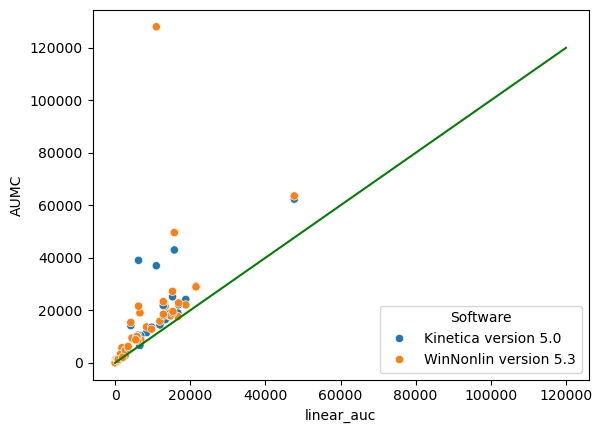

In [58]:
sns.scatterplot(plot_me, x = 'linear_auc', y = 'AUMC', hue = 'Software')
plt.plot(np.linspace(0,120000, 10), np.linspace(0,120000, 10), color = 'green')

# CL/F

In [16]:
auc_df = xth_df.merge(auc_df, how = 'left', on = 'ID')

In [17]:
auc_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime,AUC,AUCMC,MRT
0,L1,0.00,0,xanthohumol,20.0,oral,M,0.0,72.000,523.2500,7.267361
1,L1,0.25,0,xanthohumol,NaN,NaN,M,0.0,72.000,523.2500,7.267361
2,L1,0.50,0,xanthohumol,NaN,NaN,M,0.0,72.000,523.2500,7.267361
3,L1,1.00,34,xanthohumol,NaN,NaN,M,34.0,72.000,523.2500,7.267361
4,L1,1.50,15,xanthohumol,NaN,NaN,M,22.5,72.000,523.2500,7.267361
...,...,...,...,...,...,...,...,...,...,...,...
667,H17,24.00,6,xanthohumol,NaN,NaN,M,144.0,438.625,4512.4375,10.287689
668,H17,48.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689
669,H17,72.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689
670,H17,96.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689


In [ ]:
auc_df['dose_ug'] = auc_df['DOSE'] * 1000
auc_df['cl/f'] = auc_df['dose_ug']/auc_df['AUC']
clf_df = auc_df[['ID', 'cl/f']].dropna().copy()
clf_df #these are close, but the AUC I was calculating should 

,ID,cl/f
0,L1,277.777778
15,L2,61.279203
30,L3,237.741456
45,L4,1600.000000
60,L5,107.671602
75,L6,104.986877
90,L7,139.494333
105,L8,99.564406
120,L9,148.560817
135,L10,772.946860
